<a href="https://colab.research.google.com/github/Mehdi-derafshi/Clssification-MNIST/blob/main/Medical_Cost_Personal_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Let's try one-hot encode our DataFrame so it's all numbers

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.astype(int)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,0,1,1,0,0,1,0,0
1334,18,31,0,2205,1,0,1,0,1,0,0,0
1335,18,36,0,1629,1,0,1,0,0,0,1,0
1336,21,25,0,2007,1,0,1,0,0,0,0,1


In [5]:
# create x & y values (features and labels)

x = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [6]:
# create training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)


In [7]:
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [8]:
# Build a neural network
import tensorflow as tf
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])


insurance_model.fit(tf.constant(x_train), tf.constant(y_train), epochs=10)

Epoch 1/10
34/34 [==============================] - 2s 4ms/step - loss: 8456.0166 - mae: 8456.0166
Epoch 2/10
34/34 [==============================] - 0s 3ms/step - loss: 7493.6309 - mae: 7493.6309
Epoch 3/10
34/34 [==============================] - 0s 3ms/step - loss: 7444.0273 - mae: 7444.0273
Epoch 4/10
34/34 [==============================] - 0s 3ms/step - loss: 7387.4321 - mae: 7387.4321
Epoch 5/10
34/34 [==============================] - 0s 3ms/step - loss: 7471.2456 - mae: 7471.2456
Epoch 6/10
34/34 [==============================] - 0s 3ms/step - loss: 7537.6450 - mae: 7537.6450
Epoch 7/10
34/34 [==============================] - 0s 3ms/step - loss: 7415.7251 - mae: 7415.7251
Epoch 8/10
34/34 [==============================] - 0s 4ms/step - loss: 7483.8379 - mae: 7483.8379
Epoch 9/10
34/34 [==============================] - 0s 3ms/step - loss: 7509.6841 - mae: 7509.6841
Epoch 10/10
34/34 [==============================] - 0s 3ms/step - loss: 7430.8203 - mae: 7430.8203


In [9]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 9211.2900 - mae: 9211.2900


[9211.2900390625, 9211.2900390625]

Right now it looks like our model isn't performing too well... let's improve it!

we can add an extra layer with more hidden units and use the Adam optimizer
or train for longer

In [10]:
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])
insurance_model_2.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13045.1348 - mae: 13045.1348
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12910.4951 - mae: 12910.4951
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12620.5547 - mae: 12620.5547
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12020.6270 - mae: 12020.6270
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10962.3330 - mae: 10962.3330
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9527.8809 - mae: 9527.8809
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8152.3486 - mae: 8152.3486
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7441.9224 - mae: 7441.9224
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7309.4634 - mae: 7309.4634
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7280.7656 - mae:

In [11]:
insurance_model_2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 5916.7217 - mae: 5916.7217


[5916.7216796875, 5916.7216796875]

In [12]:
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])


history= insurance_model_3.fit(x_train, y_train, epochs=200)

Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 13015.0088 - mae: 13015.0088
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 12828.4678 - mae: 12828.4678
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 12440.6113 - mae: 12440.6113
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 11703.7959 - mae: 11703.7959
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 10512.9316 - mae: 10512.9316
Epoch 6/500
34/34 [==============================] - 0s 4ms/step - loss: 9075.7930 - mae: 9075.7930
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 7906.3120 - mae: 7906.3120
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 7407.2192 - mae: 7407.2192
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 7309.8335 - mae: 7309.8335
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 7280.6567 - mae:

In [13]:
# evaluate our third model
insurance_model_3.evaluate(x_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3621.8159 - mae: 3621.8159


[3621.81591796875, 3621.81591796875]

Text(0.5, 0, 'epochs')

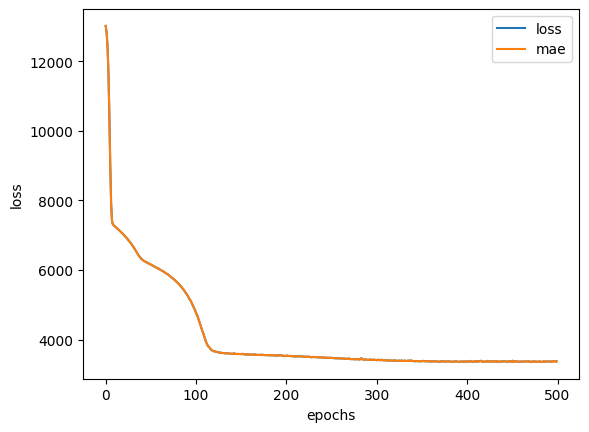

In [14]:
 pd.DataFrame(history.history).plot()
 plt.ylabel("loss")
 plt.xlabel("epochs")

### Preprocessing data (normalization and stadardization)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# create a column transfer

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# create x & y

x = insurance.drop("charges", axis=1)
y = insurance['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

ct.fit(x_train)

x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)


# Built a neural network model to fit on our normalized data

In [24]:
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['mae'])


insurance_model_4.fit(x_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13084.8164 - mae: 13084.8164
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13075.5850 - mae: 13075.5850
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13053.2490 - mae: 13053.2490
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13007.3955 - mae: 13007.3955
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 12926.9170 - mae: 12926.9170
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 12800.1621 - mae: 12800.1621
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12616.6914 - mae: 12616.6914
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12366.4863 - mae: 12366.4863
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12040.1523 - mae: 12040.1523
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11631.15

In [25]:
insurance_model_4.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4072.6726 - mae: 4072.6726


[4072.672607421875, 4072.672607421875]